In [257]:
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
#import the requests library
import requests
#Import the API key
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the time module.
import time
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [258]:
#Createa set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.00, high=90.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [259]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [260]:
#Use the tuple()function to display the latitude and longitude combination
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
         citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

belushya guba ru
culleredo es
oranjemund na
belushya guba ru
ponta do sol cv
pacocha pe
lebu cl
hermanus za
jamestown sh
hermanus za
jamestown sh
taolanaro mg
mahebourg mu
dolores ar
pirgos gr
ushuaia ar
ponta do sol cv
noyabrsk ru
kalnibolotskaya ru
arraial do cabo br
lagoa pt
alexandria eg
ushuaia ar
warrington us
hermanus za
camana pe
ilulissat gl
barentsburg sj
salinopolis br
la rioja ar
paamiut gl
berlevag no
saldanha za
pasni pk
vestmanna fo
ushuaia ar
mmathubudukwane bw
mahebourg mu
oyotun pe
mahebourg mu
ushuaia ar
ushuaia ar
sorvag fo
ibra om
belushya guba ru
dikson ru
mattru sl
torbay ca
taolanaro mg
cumaribo co
rochegda ru
west bay ky
bull savanna jm
souillac mu
punta arenas cl
mpika zm
ponta do sol cv
cheremukhovo ru
matara lk
marienburg sr
el tocuyo ve
maniitsoq gl
ponta do sol cv
cape town za
kucevo rs
upernavik gl
georgetown sh
port alfred za
codrington ag
shar kz
saint-augustin ca
hofn is
vestmannaeyjar is
manassas park us
rosario br
berlevag no
souillac mu
rawah iq
esc

taolanaro mg
cockburn harbour tc
prieska za
marcona pe
dikson ru
amderma ru
gari ru
punta arenas cl
likasi cd
busselton au
xai-xai mz
sorland no
ushuaia ar
tumannyy ru
viedma ar
east london za
cartagena del chaira co
dikson ru
porkhov ru
hirtshals dk
faya td
bambous virieux mu
umm kaddadah sd
cape town za
olafsvik is
gazojak tm
upernavik gl
skala fourkas gr
yarada in
toliary mg
cape town za
korla cn
berlevag no
aflu dz
taolanaro mg
luderitz na
cidreira br
georgetown sh
sabzevar ir
mar del plata ar
tabas ir
barentsburg sj
coquimbo cl
lethem gy
bredasdorp za
narok ke
naryan-mar ru
victoria sc
mar del plata ar
hermanus za
chake chake tz
vestmannaeyjar is
jamestown sh
bereznik ru
chuy uy
timiryazevskiy ru
bambous virieux mu
cozumel mx
sorvag fo
kazbegi ge
ushuaia ar
saint-augustin ca
mar del plata ar
taolanaro mg
mahon es
qaanaaq gl
port alfred za
qaanaaq gl
huarmey pe
san antonio cl
santa lucia es
barbar sd
puerto ayacucho ve
luderitz na
ushuaia ar
svetlopolyansk ru
arzgir ru
babanusah sd

arraial do cabo br
san francisco ar
busselton au
clyde river ca
tiznit ma
lincoln ar
cape town za
bredasdorp za
cape town za
amderma ru
saint-francois gp
hermanus za
castro cl
taolanaro mg
ilulissat gl
hermanus za
port alfred za
hermanus za
kunya ru
yar-sale ru
oistins bb
pangnirtung ca
mizoch ua
qaanaaq gl
bossembele cf
ivot ru
upernavik gl
klaksvik fo
henties bay na
port alfred za
port alfred za
hithadhoo mv
ribeira grande pt
georgetown sh
arraial do cabo br
saldanha za
taolanaro mg
amderma ru
pangnirtung ca
tasiilaq gl
ushuaia ar
eydhafushi mv
dodola et
ust-ishim ru
gazli uz
belushya guba ru
necochea ar
mayumba ga
mar del plata ar
belushya guba ru
camacupa ao
asfi ma
breznita-motru ro
punta arenas cl
upernavik gl
tasiilaq gl
aflu dz
emirdag tr
villeneuve-sur-lot fr
bredasdorp za
severnoye ru
jiroft ir
ushuaia ar
cidreira br
longyearbyen sj
teguldet ru
arraial do cabo br
turukhansk ru
arraial do cabo br
taolanaro mg
walvis bay na
ponta do sol cv
henties bay na
porto novo cv
montepuez

In [261]:
#Create a list for holding the cities
cities = []
#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add to the cities list
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count
len(cities)

630

In [262]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=be247afa12502137d0408caf60056d6c


In [263]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=be247afa12502137d0408caf60056d6c&q=Boston


In [264]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [265]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [266]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [267]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"base":"stations","main":{"temp":73.92,"feels_like":67.48,"temp_min":71.01,"temp_max":75.99,"pressure":1021,"humidity":35},"visibility":10000,"wind":{"speed":9.17,"deg":200},"clouds":{"all":75},"dt":1604777491,"sys":{"type":1,"id":3486,"country":"US","sunrise":1604748340,"sunset":1604784617},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}'

In [268]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 73.92,
  'feels_like': 67.48,
  'temp_min': 71.01,
  'temp_max': 75.99,
  'pressure': 1021,
  'humidity': 35},
 'visibility': 10000,
 'wind': {'speed': 9.17, 'deg': 200},
 'clouds': {'all': 75},
 'dt': 1604777491,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1604748340,
  'sunset': 1604784617},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [269]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [270]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [271]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 73.92,
  'feels_like': 67.48,
  'temp_min': 71.01,
  'temp_max': 75.99,
  'pressure': 1021,
  'humidity': 35},
 'visibility': 10000,
 'wind': {'speed': 9.17, 'deg': 200},
 'clouds': {'all': 75},
 'dt': 1604777491,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1604748340,
  'sunset': 1604784617},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [272]:
# Get the JSON data.
boston_data = city_weather.json()

In [273]:
boston_data['sys']

{'type': 1,
 'id': 3486,
 'country': 'US',
 'sunrise': 1604748340,
 'sunset': 1604784617}

In [274]:
boston_data['dt']

1604777491

In [275]:
boston_data['coord']['lat']

42.36

In [276]:
boston_data['main']['temp_max']

75.99

In [277]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 75.99 35 75 9.17


In [278]:
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2020, 11, 7, 19, 31, 31)

In [279]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [280]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [281]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 13 | culleredo
Processing Record 3 of Set 13 | oranjemund
Processing Record 4 of Set 13 | ponta do sol
Processing Record 5 of Set 13 | pacocha
Processing Record 6 of Set 13 | lebu
Processing Record 7 of Set 13 | hermanus
Processing Record 8 of Set 13 | jamestown
Processing Record 9 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 13 | mahebourg
Processing Record 11 of Set 13 | dolores
Processing Record 12 of Set 13 | pirgos
Processing Record 13 of Set 13 | ushuaia
Processing Record 14 of Set 13 | noyabrsk
Processing Record 15 of Set 13 | kalnibolotskaya
Processing Record 16 of Set 13 | arraial do cabo
Processing Record 17 of Set 13 | lagoa
Processing Record 18 of Set 13 | alexandria
Processing Record 19 of Set 13 | warrington
Processing Record 20 of Set 13 | camana
Processing Record 21 of Set 13 | ilulissat
Processing Record 22 of Set 13 | barentsburg
City n

Processing Record 34 of Set 16 | benguela
Processing Record 35 of Set 16 | sanchez
Processing Record 36 of Set 16 | holme
Processing Record 37 of Set 16 | bambous virieux
Processing Record 38 of Set 16 | washington
Processing Record 39 of Set 16 | mwinilunga
Processing Record 40 of Set 16 | usinsk
Processing Record 41 of Set 16 | igrim
Processing Record 42 of Set 16 | havoysund
Processing Record 43 of Set 16 | nurota
Processing Record 44 of Set 16 | lodja
Processing Record 45 of Set 16 | talnakh
Processing Record 46 of Set 16 | ordynskoye
Processing Record 47 of Set 16 | vengerovo
Processing Record 48 of Set 16 | andra
Processing Record 49 of Set 16 | jizan
Processing Record 50 of Set 16 | puntarenas
Processing Record 1 of Set 17 | saint george
Processing Record 2 of Set 17 | sinnamary
Processing Record 3 of Set 17 | mangrol
Processing Record 4 of Set 17 | mango
Processing Record 5 of Set 17 | rajpur
Processing Record 6 of Set 17 | castro
Processing Record 7 of Set 17 | kislyakovskaya


Processing Record 17 of Set 20 | radstadt
Processing Record 18 of Set 20 | sabla
Processing Record 19 of Set 20 | kemise
Processing Record 20 of Set 20 | nea kallikratia
Processing Record 21 of Set 20 | adamas
Processing Record 22 of Set 20 | mumford
Processing Record 23 of Set 20 | ostrovnoy
Processing Record 24 of Set 20 | sao gabriel da cachoeira
Processing Record 25 of Set 20 | szczytno
Processing Record 26 of Set 20 | ponta delgada
Processing Record 27 of Set 20 | randolph
Processing Record 28 of Set 20 | maarianhamina
Processing Record 29 of Set 20 | sao filipe
Processing Record 30 of Set 20 | ayagoz
Processing Record 31 of Set 20 | le port
Processing Record 32 of Set 20 | harper
Processing Record 33 of Set 20 | malakal
Processing Record 34 of Set 20 | masallatah
Processing Record 35 of Set 20 | ibate
Processing Record 36 of Set 20 | crotone
Processing Record 37 of Set 20 | yining
Processing Record 38 of Set 20 | chuhar kana
Processing Record 39 of Set 20 | uruzgan
Processing Rec

Processing Record 3 of Set 24 | svetlogorsk
Processing Record 4 of Set 24 | antalaha
Processing Record 5 of Set 24 | khor
Processing Record 6 of Set 24 | morti
City not found. Skipping...
Processing Record 7 of Set 24 | pangody
Processing Record 8 of Set 24 | chardara
Processing Record 9 of Set 24 | formoso do araguaia
City not found. Skipping...
Processing Record 10 of Set 24 | bazpur
Processing Record 11 of Set 24 | finnsnes
Processing Record 12 of Set 24 | novomichurinsk
Processing Record 13 of Set 24 | qasigiannguit
Processing Record 14 of Set 24 | kasane
Processing Record 15 of Set 24 | becerril
Processing Record 16 of Set 24 | kamenka
Processing Record 17 of Set 24 | cabimas
Processing Record 18 of Set 24 | cassilandia
Processing Record 19 of Set 24 | eirunepe
Processing Record 20 of Set 24 | yalta
Processing Record 21 of Set 24 | mormugao
Processing Record 22 of Set 24 | taywarah
Processing Record 23 of Set 24 | larkollen
Processing Record 24 of Set 24 | oktyabrskiy
Processing R

In [282]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Culleredo,43.29,-8.39,59.00,87,20,5.82,ES,2020-11-07 19:33:33
1,Oranjemund,-28.55,16.43,63.28,85,33,3.13,NA,2020-11-07 19:33:33
2,Ponta Do Sol,32.67,-17.10,66.20,72,20,3.36,PT,2020-11-07 19:33:33
3,Pacocha,-17.58,-71.33,68.00,72,90,5.82,PE,2020-11-07 19:33:34
4,Lebu,-37.62,-73.65,56.68,61,0,22.19,CL,2020-11-07 19:33:17
5,Hermanus,-34.42,19.23,60.01,82,0,13.00,ZA,2020-11-07 19:31:55
6,Jamestown,42.10,-79.24,69.01,39,1,6.93,US,2020-11-07 19:31:42
7,Mahebourg,-20.41,57.70,73.40,78,20,8.05,MU,2020-11-07 19:33:37
8,Dolores,-36.31,-57.68,73.44,64,7,9.37,AR,2020-11-07 19:33:38
9,Pirgos,35.12,25.72,66.00,62,10,15.99,GR,2020-11-07 19:33:38


In [283]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Culleredo,ES,2020-11-07 19:33:33,43.29,-8.39,59.00,87,20,5.82
1,Oranjemund,NA,2020-11-07 19:33:33,-28.55,16.43,63.28,85,33,3.13
2,Ponta Do Sol,PT,2020-11-07 19:33:33,32.67,-17.10,66.20,72,20,3.36
3,Pacocha,PE,2020-11-07 19:33:34,-17.58,-71.33,68.00,72,90,5.82
4,Lebu,CL,2020-11-07 19:33:17,-37.62,-73.65,56.68,61,0,22.19


In [284]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [285]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [286]:
# Get today's date in seconds.
today = time.strftime("%x")
today

'11/07/20'

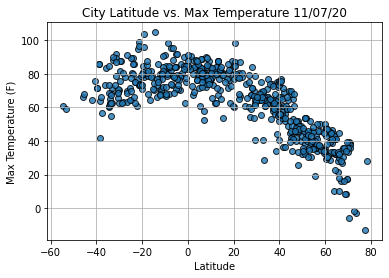

In [287]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

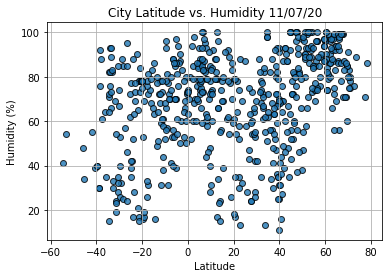

In [288]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

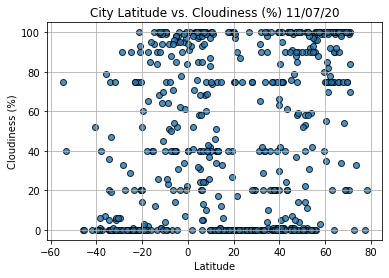

In [289]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

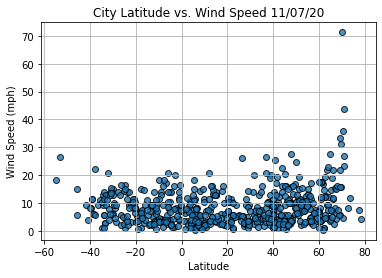

In [290]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [309]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [310]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

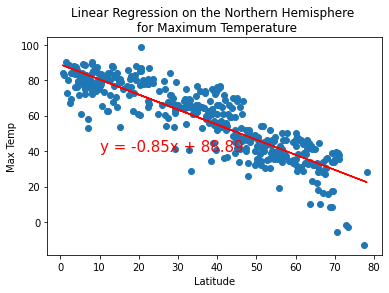

In [311]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 'Max Temp',(10,40))

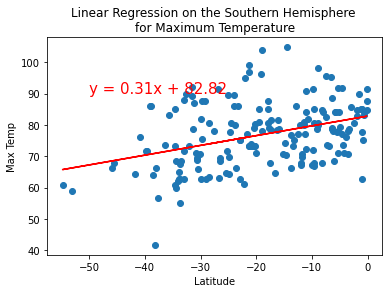

In [314]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

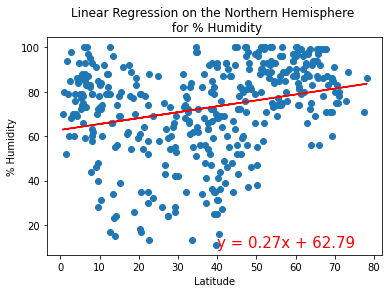

In [315]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

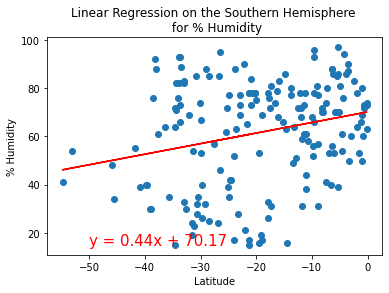

In [316]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

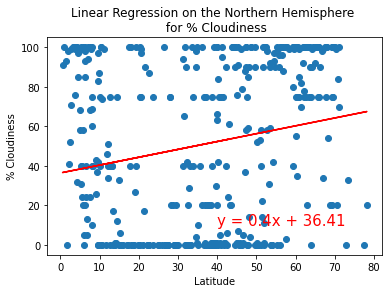

In [319]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

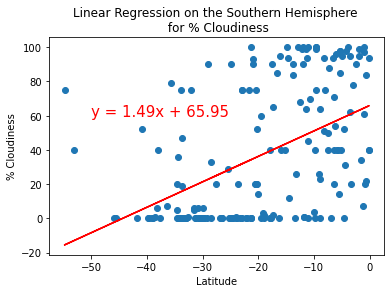

In [320]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

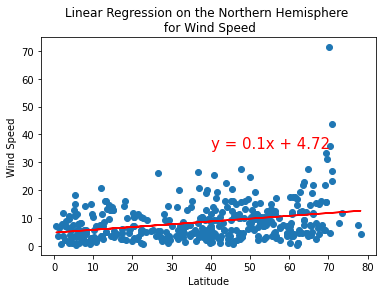

In [321]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

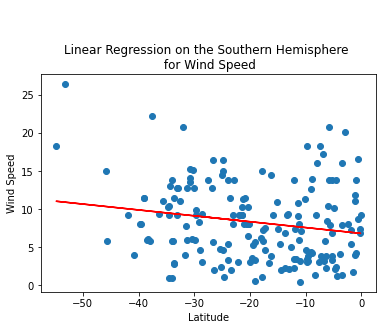

In [322]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))